In [ ]:
# Homework 2 Part 1 (due 7/07/2024), Joshua Piesner, Kelvin Wang, Tuna Akmehmet
#Hello

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [ ]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Define the number of samples
n = len(y)

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


R2 0.03530218264671636


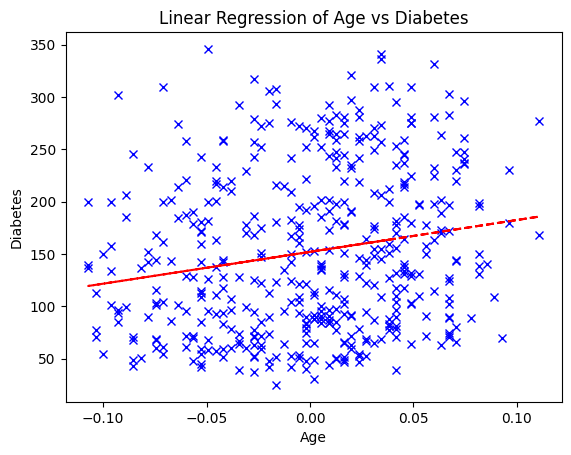

In [ ]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')
plt.xlabel("Age")
plt.ylabel('Diabetes')
plt.title('Linear Regression of Age vs Diabetes')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')
plt.show()

  variable  coefficient   intercept     t_stat           rss          mse  \
0      age   304.183075  152.133484   4.021761  2.528482e+06  5720.547017   
1      sex    69.715356  152.133484   0.906167  2.616149e+06  5918.888900   
2      bmi   949.435260  152.133484  15.221767  1.719582e+06  3890.456585   
3       bp   714.738259  152.133484  10.344289  2.110158e+06  4774.113902   
4       s1   343.254452  152.133484   4.561218  2.503186e+06  5663.315624   
5       s2   281.784593  152.133484   3.715987  2.541607e+06  5750.241103   
6       s3  -639.145279  152.133484  -9.033766  2.212502e+06  5005.661621   
7       s4   696.883030  152.133484  10.026172  2.135363e+06  4831.138386   
8       s5   916.137375  152.133484  14.429599  1.781701e+06  4030.998723   
9       s6   619.222821  152.133484   8.703011  2.237572e+06  5062.380595   

         rse        r2  
0  75.805999  0.035302  
1  77.108968  0.001854  
2  62.515122  0.343924  
3  69.251819  0.194906  
4  75.425844  0.044954  
5 

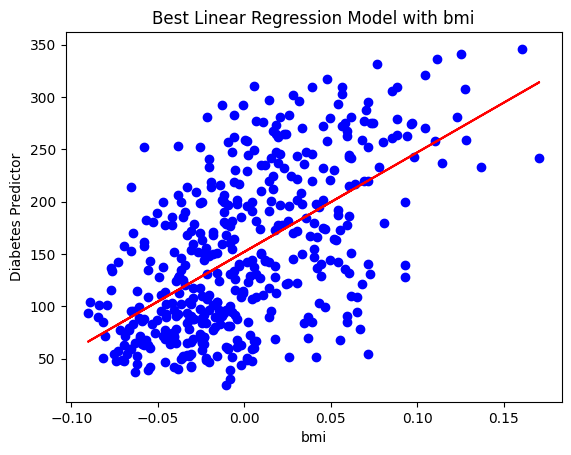

In [ ]:
results = []

for col in X.columns:
    Xi = X[col].values.reshape(-1, 1)
    model = LinearRegression().fit(Xi, y)
    y_pred = model.predict(Xi)

    # Calculate within-sample RSS, MSE, SE, t-statistic
    rss = np.sum((y - y_pred) ** 2)
    mse = rss / n
    se = np.sqrt(mse / np.sum((Xi - np.mean(Xi)) ** 2))
    t_stat = model.coef_[0] / se

    # Calculate within-sample RSE, and R²
    rse = np.sqrt(rss / (n - 2))
    r2 = model.score(Xi, y)

    # Append results
    results.append({
        'variable': col,
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        't_stat': t_stat,
        'rss': rss,
        'mse': mse,
        'rse': rse,
        'r2': r2
    })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Plot the best fitting model
best_model = results_df.loc[results_df['r2'].idxmax()] # Using R2 here because R2 is all positive values, but t-statistic would work the same way
Xi = X[best_model['variable']].values.reshape(-1, 1)
model = LinearRegression().fit(Xi, y)
y_pred = model.predict(Xi)

plt.scatter(Xi, y, color='blue')
plt.plot(Xi, y_pred, color='red')
plt.xlabel(best_model['variable'])
plt.ylabel('Diabetes Predictor')
plt.title(f"Best Linear Regression Model with {best_model['variable']}")
plt.show()

In [ ]:
# Fit a multivariate linear model
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Calculate the f-statistic
rss = np.sum((y - y_pred) ** 2)
tss = np.sum((y - np.mean(y)) ** 2)
r2 = model.score(X, y)
f_stat = (r2 / (1 - r2)) * ((n - len(X.columns) - 1) / len(X.columns))

# Calculate within-sample RSS, MSE, RSE, and R²
rss = np.sum((y - y_pred) ** 2)
mse = rss / n
rse = np.sqrt(mse)
r2 = model.score(X, y)

# Display results
print(f"F-statistic: {f_stat}")
print(f"RSS: {rss}")
print(f"MSE: {mse}")
print(f"RSE: {rse}")
print(f"R²: {r2}")

F-statistic: 46.27243958524322
RSS: 1263985.7856333435
MSE: 2859.69634758675
RSE: 53.47612876402657
R²: 0.5177484222203499


In [ ]:
f_stats = []

for col in X.columns:
    X_reduced = X.drop(columns=[col])
    model_reduced = LinearRegression().fit(X_reduced, y)
    y_pred_reduced = model_reduced.predict(X_reduced)

    r2 = model_reduced.score(X_reduced, y)
    f_stat = (r2 / (1 - r2)) * ((n - len(X.columns) - 1) / len(X.columns))

    f_stats.append({
        'variable': col,
        'f_stat': f_stat
    })

f_stats_df = pd.DataFrame(f_stats).sort_values(by='f_stat', ascending=False)
print(f_stats_df)

# Compare with best single-variable models
best_single_vars = results_df.sort_values(by='r2', ascending=False).head(3)['variable']
print("Best single-variable models:", best_single_vars.tolist())

  variable     f_stat
0      age  46.266620
6       s3  46.225594
9       s6  46.055157
7       s4  46.023807
5       s2  45.864287
4       s1  45.529185
1      sex  43.200101
8       s5  42.479824
3       bp  41.449553
2      bmi  35.184122
Best single-variable models: ['bmi', 's5', 'bp']


Explanation for Step 4:

When we drop variables bmi, s5, and bp, the f_stat score drops the most, so these variables are the most important.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear models for each independent variable on the training set
train_results = []
test_results = []

for col in X_train.columns:
    Xi_train = X_train[col].values.reshape(-1, 1)
    Xi_test = X_test[col].values.reshape(-1, 1)
    model = LinearRegression().fit(Xi_train, y_train)

    y_train_pred = model.predict(Xi_train)
    y_test_pred = model.predict(Xi_test)

    # Calculate within-sample RSS, MSE, RSE, and R² on training set
    rss_train = np.sum((y_train - y_train_pred) ** 2)
    mse_train = rss_train / len(y_train)
    rse_train = np.sqrt(rss_train / (len(y_train)-2))
    r2_train = model.score(Xi_train, y_train)

    # Calculate out-of-sample RSS, MSE, RSE, and R² on test set
    rss_test = np.sum((y_test - y_test_pred) ** 2)
    mse_test = rss_test / len(y_test)
    rse_test = np.sqrt(rss_test / (len(y_test)-2))
    r2_test = model.score(Xi_test, y_test)

    train_results.append({
        'variable': col,
        'rss_train': rss_train,
        'mse_train': mse_train,
        'rse_train': rse_train,
        'r2_train': r2_train
    })

    test_results.append({
        'variable': col,
        'rss_test': rss_test,
        'mse_test': mse_test,
        'rse_test': rse_test,
        'r2_test': r2_test
    })

# Convert results to DataFrame for easy viewing
train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)
print("Training set results:")
print(train_results_df)
print("Test set results:")
print(test_results_df)

Training set results:
  variable     rss_train    mse_train  rse_train  r2_train
0      age  2.062138e+06  5841.751499  76.648795  0.038616
1      sex  2.144860e+06  6076.090305  78.171043  0.000051
2      bmi  1.360502e+06  3854.112652  62.258119  0.365724
3       bp  1.720649e+06  4874.360692  70.015247  0.197821
4       s1  2.059558e+06  5834.441404  76.600823  0.039819
5       s2  2.093488e+06  5930.559798  77.229218  0.024001
6       s3  1.828681e+06  5180.398942  72.179754  0.147456
7       s4  1.757362e+06  4978.362469  70.758245  0.180705
8       s5  1.490954e+06  4223.666690  65.174636  0.304906
9       s6  1.818111e+06  5150.456018  71.970851  0.152383
Test set results:
  variable       rss_test     mse_test   rse_test   r2_test
0      age  467626.645885  5254.231976  73.314521  0.008290
1      sex  475792.321885  5345.981145  73.951858 -0.009028
2      bmi  361502.507636  4061.825928  64.460850  0.233350
3       bp  389765.666135  4379.389507  66.933289  0.173412
4       s1 

Difference in R2 and RSE between train and test: The R2 and RSE numbers are very much comparable for both the test and the train set. Trainin gset had slightly better results.


In [ ]:
# Fit a multivariate linear model
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)

# Calculate the f-statistic
rss_train = np.sum((y_train - y_train_pred) ** 2)
tss_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = model.score(X_train, y_train)
f_train_stat = (r2_train / (1 - r2_train)) * ((len(y_train) - len(X_train.columns) - 1) / len(X_train.columns))

# Calculate within-sample RSS, MSE, RSE, and R²
rss_train = np.sum((y_train - y_train_pred) ** 2)
mse_train = rss_train / len(y_train)
rse_train = np.sqrt(mse_train)
r2_train = model.score(X_train, y_train)

# Display results
print(f"F-statistic: {f_train_stat}")
print(f"RSS: {rss_train}")
print(f"MSE: {mse_train}")
print(f"RSE: {rse_train}")
print(f"R²: {r2_train}")
print("")

y_test_pred = model.predict(X_test)

# Calculate the f-statistic
rss_test = np.sum((y_test - y_test_pred) ** 2)
tss_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = model.score(X_test, y_test)
f_test_stat = (r2_test / (1 - r2_test)) * ((len(y_test) - len(X_test.columns) - 1) / len(X_test.columns))

# Calculate within-sample RSS, MSE, RSE, and R²
rss_test = np.sum((y_test - y_test_pred) ** 2)
mse_test = rss_test / len(y_test)
rse_test = np.sqrt(mse_test)
r2_test = model.score(X_test, y_test)

# Display results
print(f"F-statistic: {f_test_stat}")
print(f"RSS: {rss_test}")
print(f"MSE: {mse_test}")
print(f"RSE: {rse_test}")
print(f"R²: {r2_test}")

F-statistic: 38.24525407339107
RSS: 1012598.0451009589
MSE: 2868.5497028355776
RSE: 53.55884336723094
R²: 0.5279193863361498

F-statistic: 6.449249854361018
RSS: 258117.23293591983
MSE: 2900.1936284934814
RSE: 53.85344583676593
R²: 0.4526027629719195


Multivariate: difference in R2 and RSE between train and test sets: the test set has better statistics.